# FACT - Analysis
## I. Imports

In [1]:
import pandas as pd
import numpy as np
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import poisson
from fact.io import read_h5py
import h5py

## II. Load data

In [2]:
# check for keys in hdf5 file
f = h5py.File('open_crab_sample_dl3.hdf5', 'r+')
f.keys()

<KeysViewHDF5 ['events', 'runs']>

In [3]:
# load data and simulation events into pandas dataframes
data = read_h5py('open_crab_sample_dl3.hdf5', key='events')
test = read_h5py('gamma_corsika_headers.hdf5', key='corsika_events')
simulation = read_h5py('gamma_test_dl3.hdf5', key='events')
runs = read_h5py('open_crab_sample_dl3.hdf5', key='runs')

In [4]:
# get description of data and simulation
data.describe()

,dec_prediction,disp_prediction,event_num,gamma_energy_prediction,gamma_prediction,night,pointing_position_az,pointing_position_zd,ra_prediction,run_id,theta_deg,theta_deg_off_1,theta_deg_off_2,theta_deg_off_3,theta_deg_off_4,theta_deg_off_5
count,757993.000000,757993.000000,757993.000000,757993.000000,757993.000000,7.579930e+05,757993.000000,757993.000000,757993.000000,757993.000000,757993.000000,757993.000000,757993.000000,757993.000000,757993.000000,757993.000000
mean,22.013236,-0.297020,9178.316984,4360.885264,0.334372,2.013110e+07,2.625072,16.398240,5.573512,185.519817,1.866839,1.867764,1.868912,1.869049,1.868759,1.868262
std,1.430086,94.413370,5578.627975,5247.635278,0.279194,1.687119e+00,121.375151,7.043972,0.105346,34.581621,0.840234,0.838908,0.838294,0.839201,0.839116,0.838278
min,17.679544,-241.550848,1.000000,382.068652,0.000000,2.013110e+07,-179.999448,6.354311,5.256145,93.000000,0.001748,0.004167,0.002278,0.003471,0.003737,0.002036
25%,20.966863,-72.259528,4291.000000,1050.303506,0.056302,2.013110e+07,-111.144887,10.088320,5.496346,162.000000,1.234022,1.232077,1.231835,1.234029,1.232205,1.233320
50%,22.017425,29.980384,8981.000000,2070.795594,0.289181,2.013110e+07,96.222169,15.515382,5.573351,185.000000,1.852975,1.854276,1.855854,1.854865,1.853975,1.853264
75%,23.063348,72.193873,13883.000000,5400.411264,0.574070,2.013110e+07,113.003683,22.365255,5.650583,212.000000,2.475325,2.478197,2.480973,2.478174,2.477630,2.478049
max,26.353399,227.165589,22167.000000,41309.946415,0.998809,2.013111e+07,179.999775,30.426857,5.889260,246.000000,4.558997,4.721653,4.583892,4.591830,4.564557,4.581376


In [5]:
simulation.describe()

,ceres_event_event_reuse,corsika_event_header_event_number,corsika_event_header_first_interaction_height,corsika_event_header_num_reuse,corsika_event_header_total_energy,corsika_event_header_x,corsika_event_header_y,corsika_run_header_run_number,disp_prediction,event_num,...,run_id,source_position_az,source_position_zd,theta_deg,theta_deg_off_1,theta_deg_off_2,theta_deg_off_3,theta_deg_off_4,theta_deg_off_5,true_disp
count,771684.0,771684.000000,7.716840e+05,771684.0,771684.000000,771684.000000,771684.000000,771684.000000,771684.000000,771684.000000,...,771684.000000,7.716840e+05,771684.000000,771684.000000,771684.000000,771684.000000,771684.000000,771684.000000,771684.000000,771684.000000
mean,1.0,1500.072821,2.424770e+06,1.0,1749.621288,41.792047,52.323193,44434.117316,-1.047027,240.194374,...,44434.117316,3.530000e+02,14.640855,0.502519,0.864338,1.227285,1.366034,1.225594,0.862050,-0.693501
std,0.0,865.723617,8.290404e+05,0.0,2852.277741,8497.670004,8712.553414,44703.547995,71.889121,138.917519,...,44703.547995,3.652476e-09,8.533717,0.614289,0.507726,0.494141,0.504881,0.493825,0.507223,75.107050
min,1.0,1.000000,5.099331e+05,1.0,200.040900,-26916.096000,-30770.113000,10910.000000,-206.079733,1.000000,...,10910.000000,3.530000e+02,0.001194,0.000214,0.002446,0.001097,0.002648,0.006896,0.004675,-223.156034
25%,1.0,750.000000,1.847667e+06,1.0,638.784640,-6429.114750,-6581.087750,12372.000000,-66.470838,120.000000,...,12372.000000,3.530000e+02,7.248594,0.091911,0.571613,0.987515,1.142138,0.986030,0.569686,-67.779884
50%,1.0,1500.000000,2.277638e+06,1.0,945.514050,67.869205,94.942718,13872.000000,-28.215165,240.000000,...,13872.000000,3.530000e+02,14.496729,0.186677,0.659543,1.076516,1.233616,1.075744,0.658080,-11.971888
75%,1.0,2250.000000,2.828547e+06,1.0,1700.276650,6512.154475,6706.883525,107249.000000,65.992178,359.000000,...,107249.000000,3.530000e+02,21.928809,0.643559,0.914450,1.231654,1.379939,1.230366,0.911798,67.325990
max,1.0,3000.000000,1.142786e+07,1.0,49990.832000,26949.604000,30868.816000,108764.000000,195.509884,553.000000,...,108764.000000,3.530000e+02,29.999994,3.677617,3.716311,3.985366,3.964553,4.109763,3.935066,220.552363


In [6]:
runs.describe()

,azimuth,declination,night,ontime,right_ascension,run_id,zenith
count,218.000000,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000
mean,-183.229037,21.996060,2.013110e+07,292.733459,5.574039,185.091743,16.329725
std,64.200337,0.386131,1.680324e+00,15.315585,0.033096,34.309930,7.126205
min,-264.570000,21.628100,2.013110e+07,112.688500,5.542500,93.000000,6.360000
25%,-247.795000,21.628100,2.013110e+07,293.790007,5.542500,162.000000,9.902500
50%,-191.365000,21.628100,2.013110e+07,294.149995,5.542500,185.000000,15.275000
75%,-114.605000,22.399400,2.013110e+07,294.599998,5.608610,210.750000,22.337500
max,-95.160000,22.399400,2.013111e+07,296.340001,5.608610,246.000000,29.870000


In [7]:
test.describe()

,azimuth,event_number,first_interaction_height,first_target_id,momentum_minus_z,momentum_x,momentum_y,particle_id,run_number,starting_altitude,total_energy,zenith
count,18000000.0,1.800000e+07,1.800000e+07,18000000.0,1.800000e+07,1.800000e+07,18000000.0,1.800000e+07,1.800000e+07,18000000.0,1.800000e+07,1.800000e+07
mean,0.0,1.444599e+03,2.623324e+06,0.0,4.466992e+02,1.178653e+02,0.0,9.320676e-01,4.724382e+04,0.0,4.730965e+02,2.601062e-01
std,0.0,8.566139e+02,8.499143e+05,0.0,8.050920e+02,2.502790e+02,0.0,6.690131e-02,4.599138e+04,0.0,8.414752e+02,1.482813e-01
min,0.0,1.000000e+00,2.200000e+05,0.0,1.732256e+02,7.792237e-03,0.0,1.000000e+00,1.091000e+04,0.0,2.000000e+02,1.864444e-05
25%,0.0,7.507500e+02,1.965484e+06,0.0,2.264141e+02,4.057689e+01,0.0,1.000000e+00,1.240975e+04,0.0,2.368526e+02,1.305281e-01
50%,0.0,1.500500e+03,2.409944e+06,0.0,2.873433e+02,7.997155e+01,0.0,1.000000e+00,1.390950e+04,0.0,3.006160e+02,2.605300e-01
75%,0.0,2.250250e+03,2.979364e+06,0.0,4.320666e+02,1.257226e+02,0.0,1.000000e+00,1.072642e+05,0.0,4.519907e+02,3.908020e-01
max,0.0,3.000000e+03,1.150390e+07,0.0,4.996022e+04,2.393646e+04,0.0,1.000000e+00,1.087640e+05,0.0,4.999083e+04,5.235988e-01


## III. data Selection

In [8]:
# only select data with gamma_prediction >= 0.8
data = data[data['gamma_prediction']>= 0.8]
simulation = simulation[simulation['gamma_prediction']>= 0.8]

## IV. Theta-Square Plot and Detection Significance
### Theta-Square Plot

In [9]:
# get theta-squared for the source and the five off positions
# use poisson error for theta_on
theta_on_err = np.sqrt(data['theta_deg'])

theta_on = unp.uarray(data['theta_deg'], theta_on_err)
theta_on_squared = theta_on**2


# compute average of the five off positions
theta_off_1_squared = data['theta_deg_off_1']**2
theta_off_2_squared = data['theta_deg_off_2']**2
theta_off_3_squared = data['theta_deg_off_3']**2
theta_off_4_squared = data['theta_deg_off_4']**2
theta_off_5_squared = data['theta_deg_off_5']**2

theta_off_squared = np.concatenate((theta_off_1_squared, theta_off_2_squared, theta_off_3_squared, theta_off_4_squared, theta_off_5_squared))

(array([172., 161., 168., 147., 151., 156., 177., 181., 176., 162., 179.,
        176., 185., 145., 171., 172., 183., 164., 170., 159., 172., 165.,
        166., 200., 174., 167., 161., 188., 164., 155., 140., 170., 165.,
        151., 170., 158., 175., 168., 173., 167., 179., 184., 179., 172.,
        181., 159., 182., 164., 163., 189., 159., 168., 191., 195., 194.,
        176., 179., 167., 194., 165., 178., 138., 174., 176., 174., 189.,
        203., 173., 187., 197., 183., 183., 191., 192., 175., 186., 172.,
        186., 193., 184., 166., 172., 168., 184., 177., 193., 182., 190.,
        161., 166., 190., 171., 186., 162., 186., 159., 211., 159., 171.,
        202.]),
 array([2.54827307e-05, 3.02514693e-03, 6.02481112e-03, 9.02447532e-03,
        1.20241395e-02, 1.50238037e-02, 1.80234679e-02, 2.10231321e-02,
        2.40227963e-02, 2.70224605e-02, 3.00221247e-02, 3.30217889e-02,
        3.60214531e-02, 3.90211173e-02, 4.20207815e-02, 4.50204457e-02,
        4.80201099e-02, 5.1019

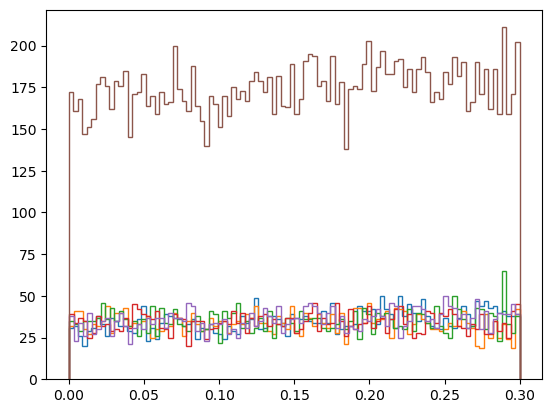

In [10]:

plt.hist(theta_off_1_squared[theta_off_1_squared<0.3], bins=100, histtype='step', label='theta_off_1_squared')
plt.hist(theta_off_2_squared[theta_off_2_squared<0.3], bins=100, histtype='step', label='theta_off_2_squared')
plt.hist(theta_off_3_squared[theta_off_3_squared<0.3], bins=100, histtype='step', label='theta_off_3_squared')
plt.hist(theta_off_4_squared[theta_off_4_squared<0.3], bins=100, histtype='step', label='theta_off_4_squared')
plt.hist(theta_off_5_squared[theta_off_5_squared<0.3], bins=100, histtype='step', label='theta_off_5_squared')
plt.hist(theta_off_squared[theta_off_squared<0.3], bins=100, histtype='step', label='theta_off_5_squared')

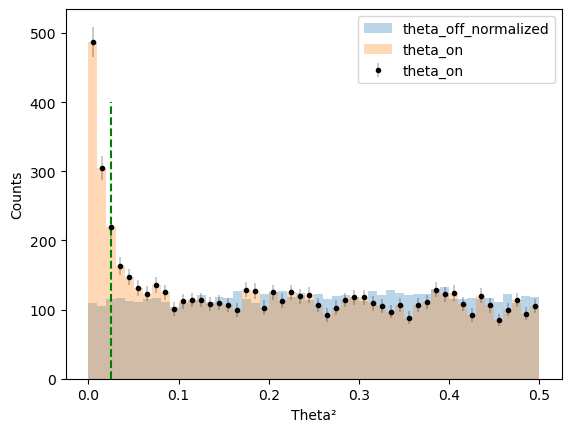

In [11]:
# BACKGROUND

#mask if thetra is minor 0.03
mask_bk = theta_off_squared < 0.5

# normalize histogram for the off positions
hist_off, bins_off = np.histogram(theta_off_squared[mask_bk], bins=50);
hist_off_norm = hist_off/5 #mean value

#plot hist off normalized
plt.hist(bins_off[:-1], bins_off, weights=hist_off_norm, label='theta_off_normalized', alpha = 0.3);


## SIGNAL
mask_sg = theta_on_squared < 0.5

hist_on, bins_on = np.histogram(unp.nominal_values(theta_on_squared[mask_sg]), bins=50);

#plot hist on
plt.hist(bins_on[:-1], bins_on, weights=hist_on, label='theta_on', alpha = 0.3);
plt.errorbar(
    (bins_on[:-1] + bins_on[1:]) / 2,  # X values (bin centers)
    hist_on,  # Y values (histogram counts)
    yerr=np.sqrt(hist_on),  # Y errors (Poisson errors)
    fmt='o',  # Marker style
    label='theta_on',  # Label for the legend
    lw=0.3,  # Line width
    markersize=3,  # Marker size
    color = 'black'

)
plt.vlines(0.025, ymin=0, ymax=400, linestyles='dashed', color='green');

plt.xlabel('Theta²')
plt.ylabel('Counts')
plt.legend()

In [12]:
# # make theta-squared plot
# number_of_bins = 40

# # normalize histogram for the off positions
# hist_off, bins_off = np.histogram(theta_off_squared, range=(0, 0.30), bins=number_of_bins)
# hist_off_norm = hist_off/5

# width_off = bins_off[1]-bins_off[0]
# center_off = (bins_off[:-1]+bins_off[1:])/2

# # get histogram for the on position
# hist_on, bins_on = np.histogram(unp.nominal_values(theta_on_squared), range=(0, 0.30), bins=number_of_bins)
# width_on = bins_on[1]-bins_on[0]
# center_on = (bins_on[:-1]+bins_on[1:])/2
# hist_on_err = np.sqrt(hist_on)

# plt.errorbar(center_on, hist_on, xerr=0.5*width_on, yerr=hist_on_err, linestyle='', label='On')
# plt.errorbar(center_off, hist_off_norm, xerr=0.5*width_off, linestyle='', label='Off')
# plt.bar(center_off, hist_off_norm, align='center', width=width_off, color='grey', alpha=0.3)
# plt.vlines(0.025, ymin=0, ymax=400, linestyles='dashed', color='grey');
# plt.xlim(0, 0.30);
# plt.ylim(0, 400);
# plt.legend();
# plt.xlabel(r'$(\theta \: / \: ^\circ)^2$');
# plt.ylabel(r'Number of events')
# plt.tight_layout();
# plt.savefig('theta_squared.pdf')

In [13]:
# select all theta square values <= 0.025^2 for the source and the 5 off positions
theta_on_squared = theta_on_squared[theta_on_squared<=0.025]
theta_off_squared = theta_off_squared[theta_off_squared<=0.025]

### Detection Significance

In [14]:
def get_detection_significance(N_on, N_off, alpha=0.2):
    '''Takes the number of reconstructed events in the On region N_on and that of the Off region N_off and returns the
    detection significance S.'''
    
    S = unp.sqrt(2)*unp.sqrt(N_on*unp.log(((1+alpha)/(alpha))*(N_on/(N_on+N_off))) + N_off*unp.log((1+alpha)*(N_off/(N_on+N_off))))
    return S

In [15]:
# get N_on and N_off from the theta-squared on and off
N_on = theta_on_squared.size
N_off = theta_off_squared.size

N_on = unp.uarray(N_on, np.sqrt(N_on))
N_off = unp.uarray(N_off, np.sqrt(N_off))

# compute significance
detection_significance = get_detection_significance(N_on, N_off)
precision = 2
print(f'Detection significance = {detection_significance:.{precision}f}')

Detection significance = 26.28+/-1.10


## V. Energy Migration

In [16]:
# get energy prediction from random forest and true energy from simulation data with selection
energy_prediction = simulation['gamma_energy_prediction'][simulation['theta_deg']<np.sqrt(0.025)]
true_energy = simulation['corsika_event_header_total_energy'][simulation['theta_deg']<np.sqrt(0.025)]

In [17]:
# get maximal and minimal bin
max_bin = np.max(energy_prediction), np.max(true_energy)
min_bin = np.min(energy_prediction), np.min(true_energy)

print('Energy Prediction, True Energy')
print(f'Max bins = {max_bin}')
print(f'Min bins = {min_bin}')

Energy Prediction, True Energy
Max bins = (40522.96187357193, 49990.832)
Min bins = (593.7985285226966, 205.58768)


In [18]:
# Number of bins for energy prediction
number_of_bins_energy_prediction = 10

# Initialize the bins array
bins_energy_prediction = np.ones(number_of_bins_energy_prediction)

# Set the underflow bin
bins_energy_prediction[0] = 0

# Create logarithmic bins from 500 to 15,000
log_bins = np.logspace(np.log10(500), np.log10(15000), number_of_bins_energy_prediction-2)

# Assign the logarithmic bins to the bins array
bins_energy_prediction[1:-1] = log_bins

# Set the overflow bin
bins_energy_prediction[-1] = 50000

print(bins_energy_prediction)


[    0.           500.           812.80679653  1321.30977697
  2147.93913407  3491.71905341  5676.18595635  9227.28504736
 15000.         50000.        ]


In [19]:
# Number of bins for true energy
number_of_bins_true_energy = 8

# Initialize the bins array
bins_true_energy = np.ones(number_of_bins_true_energy)

# Set the underflow bin
bins_true_energy[0] = 0

# Create logarithmic bins from 500 to 15,000
log_bins = np.logspace(np.log10(500), np.log10(15000), number_of_bins_true_energy - 2)

# Assign the logarithmic bins to the bins array
bins_true_energy[1:-1] = log_bins

# Set the overflow bin
bins_true_energy[-1] = 50000

print(bins_true_energy)


[    0.           500.           987.17524292  1949.02992046
  3848.06817036  7597.43526168 15000.         50000.        ]


<Figure size 640x480 with 0 Axes>

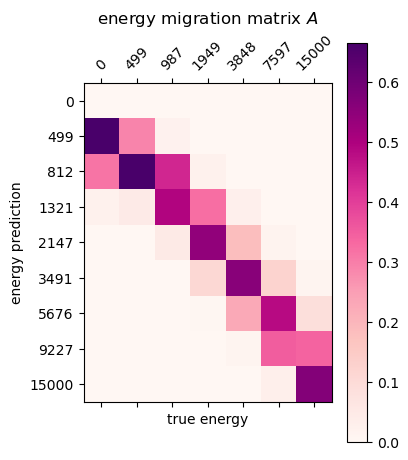

Shape of matrix:  (9, 7)


In [20]:
# Compute the histogram
matrix, xedge, yedge = np.histogram2d(energy_prediction, true_energy, bins=[bins_energy_prediction, bins_true_energy])

matrix = matrix / np.sum(matrix, axis=0)

plt.figure(constrained_layout=True)
plt.matshow(matrix, cmap='RdPu')

# Update the x and y axis with the actual bin edges
plt.xticks(ticks=np.arange(len(bins_true_energy)-1), labels=[f"{int(edge)}" for edge in bins_true_energy[:-1]], rotation=45)
plt.yticks(ticks=np.arange(len(bins_energy_prediction)-1), labels=[f"{int(edge)}" for edge in bins_energy_prediction[:-1]])

plt.ylabel('energy prediction')
plt.xlabel('true energy')
plt.title('energy migration matrix $A$')
plt.colorbar()

plt.show()

print('Shape of matrix: ', np.shape(matrix))

## VI. Naive SVD Unfolding

In [21]:
# put background in bins
background1 = data['gamma_energy_prediction'][data['theta_deg_off_1']<np.sqrt(0.025)]
background2 = data['gamma_energy_prediction'][data['theta_deg_off_2']<np.sqrt(0.025)]
background3 = data['gamma_energy_prediction'][data['theta_deg_off_3']<np.sqrt(0.025)]
background4 = data['gamma_energy_prediction'][data['theta_deg_off_4']<np.sqrt(0.025)]
background5 = data['gamma_energy_prediction'][data['theta_deg_off_5']<np.sqrt(0.025)]

background = pd.concat([background1, background2, background3, background4, background5])

b, bins_b = np.histogram(background, bins=xedge)

# average the five off positions
b = b/5
b = unp.uarray(b, np.sqrt(b))

In [22]:
# put estimated energies in bins
g, bins_g = np.histogram(data['gamma_energy_prediction'][data['theta_deg']<np.sqrt(0.025)], bins=xedge)

g = unp.uarray(g, np.sqrt(g))

In [23]:
# compute Moore-Penrose inverse
matrix_inverse = np.linalg.pinv(matrix)
# print(matrix_inverse)

In [24]:
ev = g-b
fNSVD = matrix_inverse@ev
# remove the overflow and underflow bins
fNSVD = fNSVD[1:-1]
print(fNSVD)

[230.1064440159339+/-56.578759799595105
 214.93650906436164+/-43.08433124668236
 111.17623592715098+/-25.903148569957715
 58.6746875099518+/-17.109147426645645
 20.825620229130465+/-11.772448569977653]


In [25]:
# plot
xpos = [yedge[i]-(yedge[i] - yedge[i-1])/2 for i in range(1,len(yedge))]
xpos = xpos[1:-1]
xerr = [(yedge[i] - yedge[i-1])/2 for i in range(2,len(yedge)-1)]

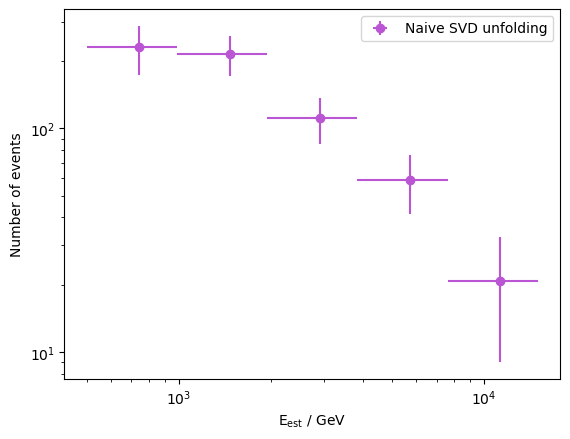

In [39]:
plt.errorbar(xpos, unp.nominal_values(fNSVD), xerr=xerr, yerr=unp.std_devs(fNSVD), fmt='o',color = 'mediumorchid', label='Naive SVD unfolding')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mathrm{E}_\mathrm{est}$ / GeV')
plt.ylabel('Number of events')
plt.legend()
plt.savefig('plots/naiveSVDunfolding.pdf')

## VII. Poisson Likelihood Unfolding

In [27]:
def negativeLogLikelihood(f, A, b, g):
    '''Returns the negative log-likelihood function for given f, A, b and g'''
    lam = A@f+b
    return -poisson.logpmf(g, lam).sum()

# bin the energy prediction
f, f_bins = np.histogram(simulation['gamma_energy_prediction'][simulation['theta_deg']<np.sqrt(0.025)], bins=yedge)

# set bounds for minimizer
Bounds= [(1,100000)]*len(f)

estimator = minimize(negativeLogLikelihood, f+100, args=(matrix, unp.nominal_values(b), unp.nominal_values(g)), method='L-BFGS-B', bounds=Bounds)

# get estimator
f_estimate = estimator['x']
f_estimate_plot = f_estimate[1:-1]
print(f'Estimation: {f_estimate_plot}')

# get Hessematrix for error calculation
Hesse_inverse = estimator['hess_inv'].todense()
# print(f'Inverse Hesse Matrix: {Hesse_inverse}')

# compute poisson error of diagonal
diag = np.diag(Hesse_inverse)
diag_sqrt = np.sqrt(diag[1:-1])
print(f'Error: {diag_sqrt}')

f_estimate_plot = unp.uarray(f_estimate_plot, diag_sqrt)

Estimation: [224.7680661  220.35562361 104.29271629  69.61319067  10.01991021]
Error: [48.27031257 37.78888927 18.07038582 13.18272378  6.57337134]


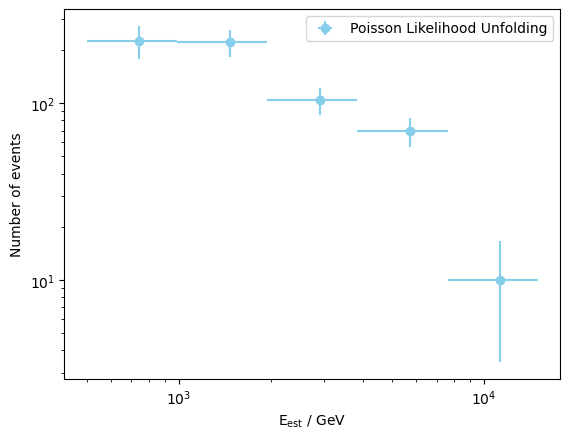

In [28]:
# plot
plt.errorbar(xpos, unp.nominal_values(f_estimate_plot), xerr=xerr, yerr=unp.std_devs(f_estimate_plot), fmt='o',color = 'skyblue', label='Poisson Likelihood Unfolding')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mathrm{E}_\mathrm{est}$ / GeV')
plt.ylabel('Number of events')
plt.legend()
plt.savefig('plots/poissonlikelihood.pdf')

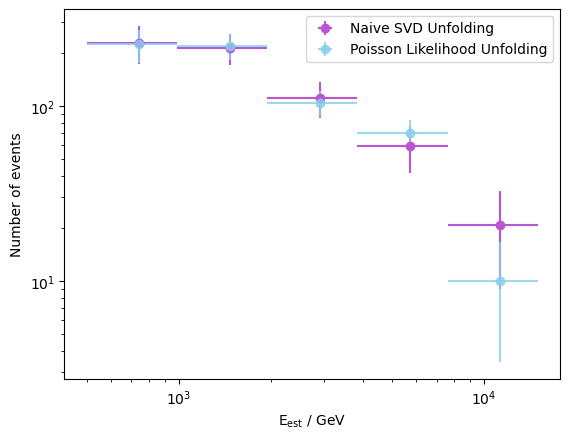

In [29]:
# combined plot
plt.errorbar(xpos, unp.nominal_values(fNSVD), xerr=xerr, yerr=unp.std_devs(fNSVD), fmt='o',color = 'mediumorchid', label='Naive SVD Unfolding')
plt.errorbar(xpos, unp.nominal_values(f_estimate_plot), xerr=xerr, yerr=unp.std_devs(f_estimate_plot), fmt='o',color = 'skyblue',alpha = 0.8, label='Poisson Likelihood Unfolding')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mathrm{E}_\mathrm{est}$ / GeV')
plt.ylabel('Number of events')
plt.legend()
plt.savefig('plots/unfolding.pdf')

## VIII. Acceptance Correction and Calculation of the Flux

In [30]:
# functions to compute flux and effective area
def get_flux(f, A, dE, t):
    return (f)/(A*dE*t)

def get_A_eff(N_selected, N_simulated, A):
    return (N_selected/N_simulated)*(A/0.7)

In [31]:
A = np.pi*27000**2

# N_selected, _ = np.histogram(simulation['gamma_energy_prediction'], bins=yedge)
N_selected, _ = np.histogram(simulation['gamma_energy_prediction'], bins=yedge)

# N_simulated, _ = np.histogram(test['total_energy'], bins=yedge)
N_simulated, _ = np.histogram(test['total_energy'], bins=yedge)

In [32]:
# compute effective area
A_eff = get_A_eff(N_selected[1:-1], N_simulated[1:-1], A)
print(A_eff)

[8.17910590e+07 3.55288223e+08 4.92155638e+08 6.28347984e+08
 6.77752532e+08]


In [33]:
dE = np.diff(yedge[1:-1])*10**(-3) #TeV 
t = runs['ontime'].sum()

# compute flux for Naive SVD and poisson log-likelihood
flux_NSVD = get_flux(fNSVD, A=A_eff, dE=dE, t=t)
flux_poisson = get_flux(f_estimate_plot, A=A_eff, dE=dE, t=t)

In [34]:
print(f'Flux NSVD: {flux_NSVD}')
print(f'Flux Poisson: {flux_poisson}')

Flux NSVD: [9.049172800417738e-11+/-2.2250179757000258e-11
 9.855781350588033e-12+/-1.9756054950927673e-12
 1.8640043930982326e-12+/-4.3429769254929207e-13
 3.902687145184712e-13+/-1.1379975345538046e-13
 6.504527040577052e-14+/-3.6769233864214896e-14]
Flux Poisson: [8.839235593068461e-11+/-1.8982797349713908e-11
 1.0104271512956359e-11+/-1.7327862619640336e-12
 1.748593840361745e-12+/-3.0297192807081464e-13
 4.630250554481212e-13+/-8.768354604493539e-14
 3.129547940895287e-14+/-2.0530803488089017e-14]


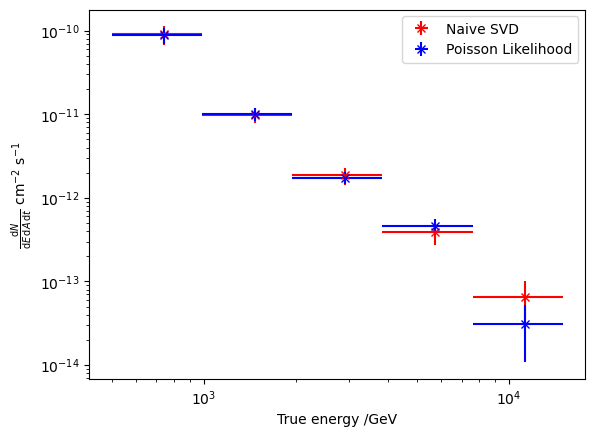

In [35]:
plt.errorbar(xpos, unp.nominal_values(flux_NSVD), xerr=xerr, yerr=unp.std_devs(flux_NSVD), fmt ='rx', label='Naive SVD')
plt.errorbar(xpos, unp.nominal_values(flux_poisson), xerr=xerr, yerr=unp.std_devs(flux_poisson), fmt ='bx', label='Poisson Likelihood') 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('True energy /GeV')
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E \, \mathrm{d}A \, \mathrm{d}t}$ cm$^{-2}$ s$^{-1}$')
plt.legend()
plt.savefig('plots/flux.pdf')

## IX. Comparison with MAGIC

In [36]:
def log_parabola(E, f, E0, alpha, beta):
    return f * (E/E0) ** (-alpha + beta * np.log(E/E0))

def HEGRA(E, phi0, gamma):
    return phi0*(E*10**(-3))**(gamma)

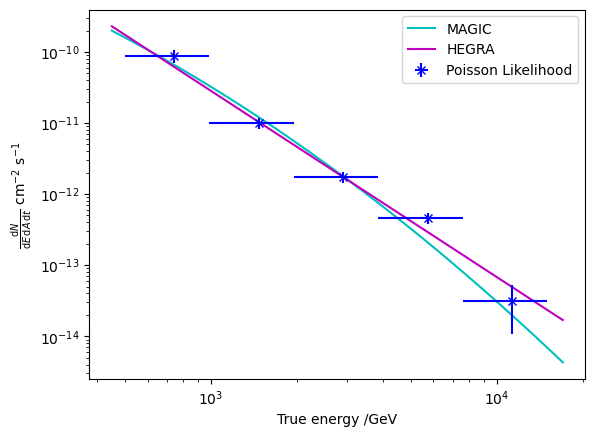

In [37]:
# plot log_parabola for MAGIC telescope with Poisson Likelihood
x_MAGIC = np.linspace(450, 17000, 10000)
y_MAGIC = log_parabola(x_MAGIC, 3.23*10**(-11), 1000, 2.47,-0.24)

#plot HEGRA telescope curve
x_HEGRA = np.linspace(450, 17000, 10000)
y_HEGRA = HEGRA(x_HEGRA, 2.83e-11, -2.62)

plt.plot(x_MAGIC, y_MAGIC, '-c', label='MAGIC')
plt.plot(x_HEGRA, y_HEGRA, '-m', label='HEGRA')
plt.errorbar(xpos, unp.nominal_values(flux_poisson), xerr=xerr, yerr=unp.std_devs(flux_poisson), fmt ='bx', label='Poisson Likelihood') 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('True energy /GeV')
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E \, \mathrm{d}A \, \mathrm{d}t}$ cm$^{-2}$ s$^{-1}$')
plt.legend()
plt.savefig('plots/comparison.pdf')